# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

# Loading the Data

In [2]:
df_bg = pd.read_csv('../datasets/games-cleaned.csv')

# Topic Modeling

In [3]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp.head()

,name,description
0,Pandemic,"In Pandemic, several virulent diseases have br..."
1,Carcassonne,Carcassonne is a tile-placement game in which ...
2,Catan,"In CATAN (formerly The Settlers of Catan), pla..."
3,7 Wonders,You are the leader of one of the 7 great citie...
4,Dominion,"&quot;You are a monarch, like your parents bef..."
...,...,...
4577,Feierabend,"Welcome to Feierabend, a.k.a. Finishing Time, ..."
4578,Nations at War: White Star Rising,Publisher's blurb:&#10;&#10;&quot;White Star R...
4579,Oaxaca: Crafts of a Culture,Among the many reasons that Oaxaca (pronounced...
4580,A Gentle Rain,"TAKE A DEEP BREATH, AND RELAX...&#10;&#10;You ..."


In [4]:
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game', 'use', 'time', 'take', 'turn', 'new', 'action'], session_id=42)

Description,Value
session_id,42
Documents,4582
Vocab Size,17103
Custom Stopwords,True


In [5]:
lda = create_model('lda', num_topics = 6, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.030657,0.001500,0.232568,0.067757,0.006744,0.660775,Topic 5,0.66
1,Carcassonne,draw place tile piece southern french landscap...,0.922959,0.002577,0.002596,0.066703,0.002583,0.002581,Topic 0,0.92
2,Catan,formerly try dominant settlement city road dic...,0.422825,0.000832,0.466997,0.107675,0.000832,0.000839,Topic 2,0.47
3,7 Wonders,leader great city ancient world gather resourc...,0.182048,0.001648,0.732209,0.001654,0.001651,0.080790,Topic 2,0.73
4,Dominion,parent ruler small pleasant kingdom river ever...,0.001661,0.001656,0.765598,0.093597,0.001655,0.135833,Topic 2,0.77


In [6]:
plot_model()

In [7]:
lda_results['Dominant_Topic'].value_counts()

Topic 2    1160
Topic 0    1102
Topic 4     711
Topic 3     664
Topic 5     637
Topic 1     308
Name: Dominant_Topic, dtype: int64

In [8]:
plot_model(lda, plot = 'topic_distribution')

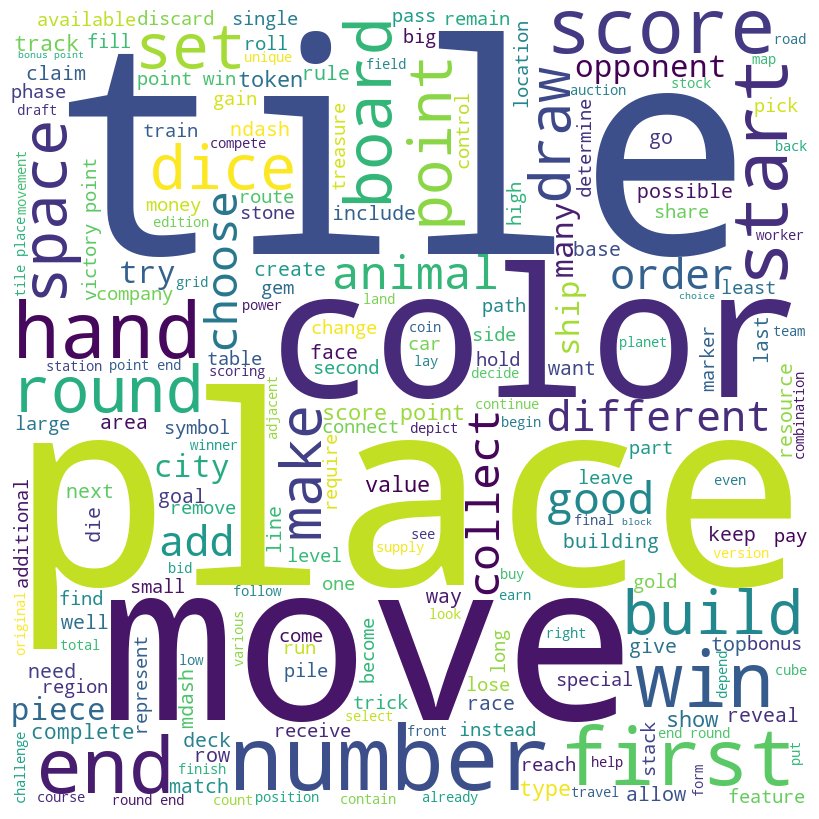

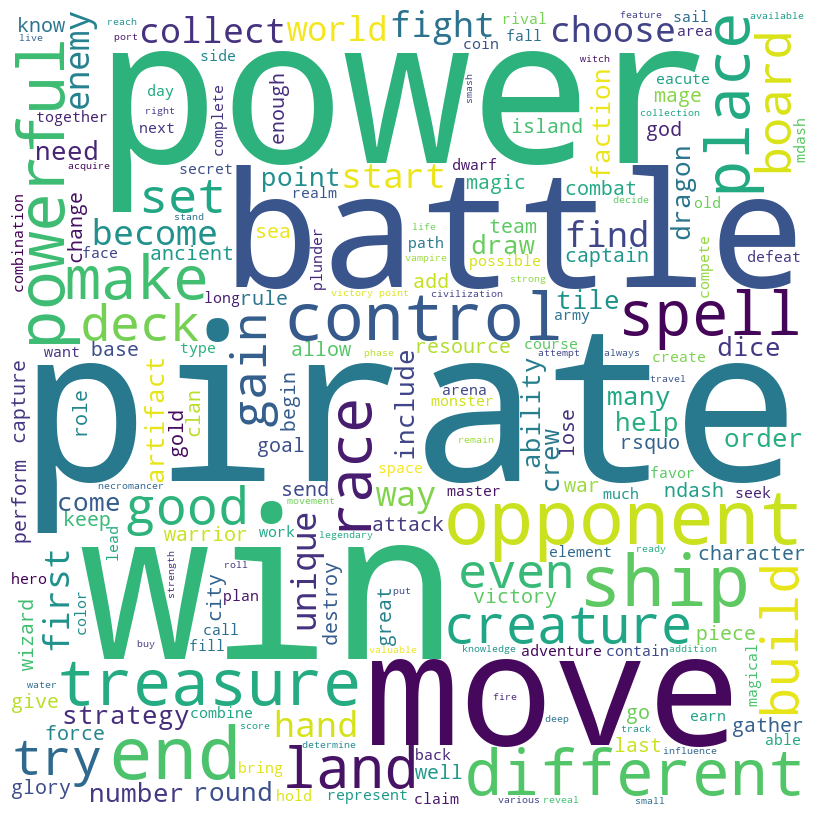

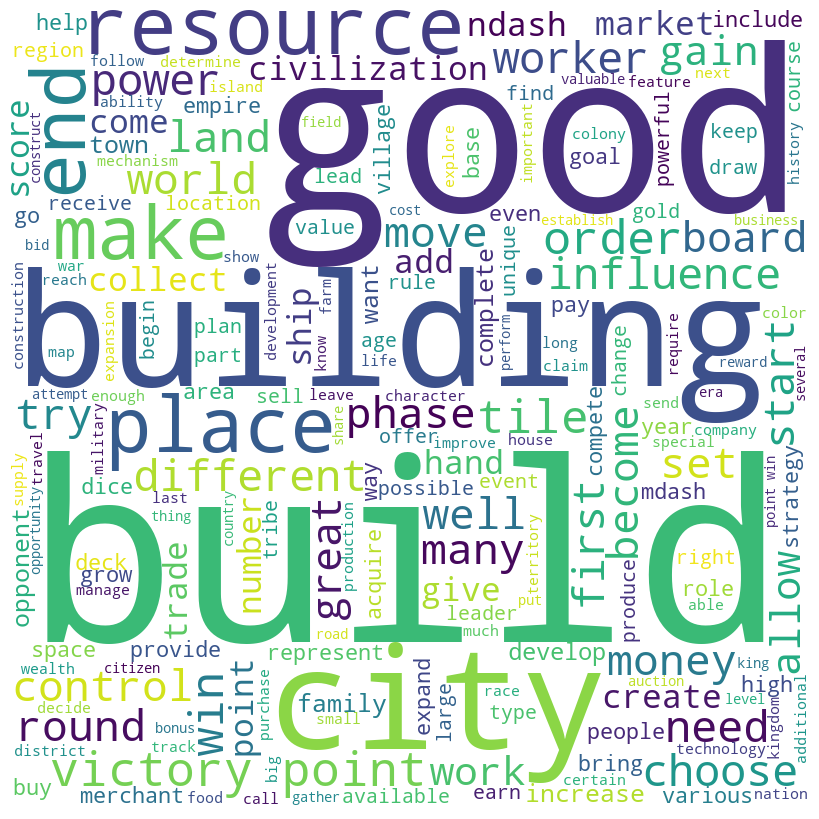

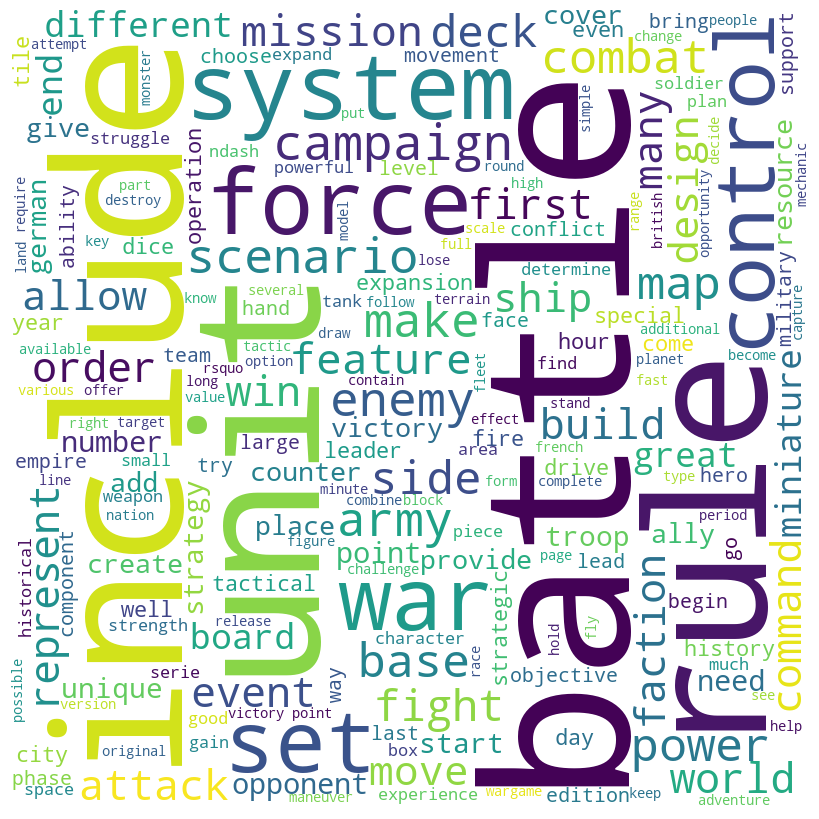

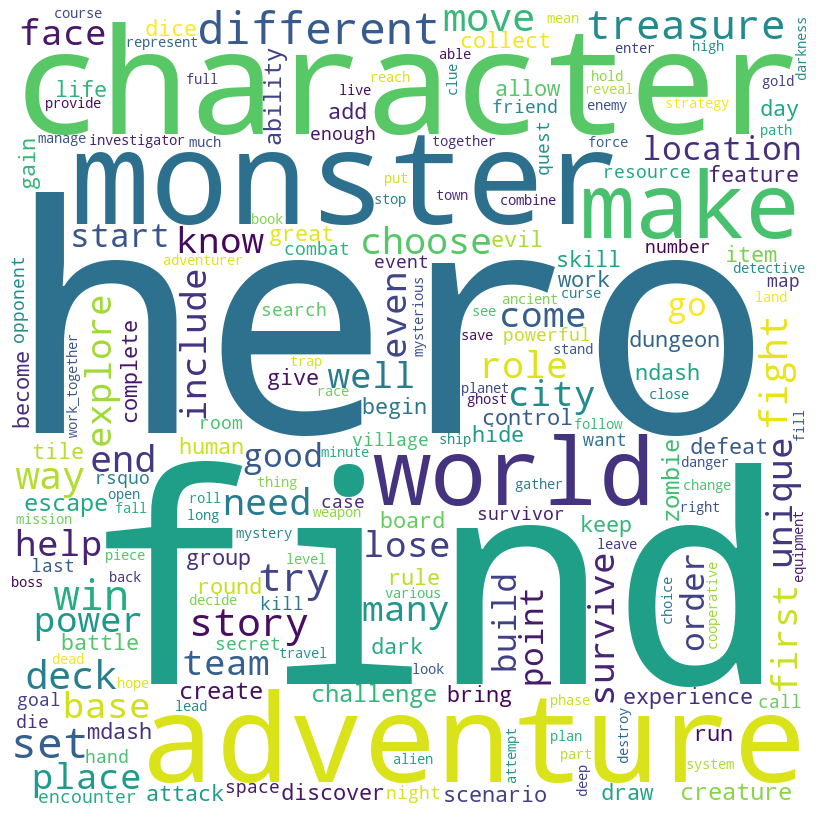

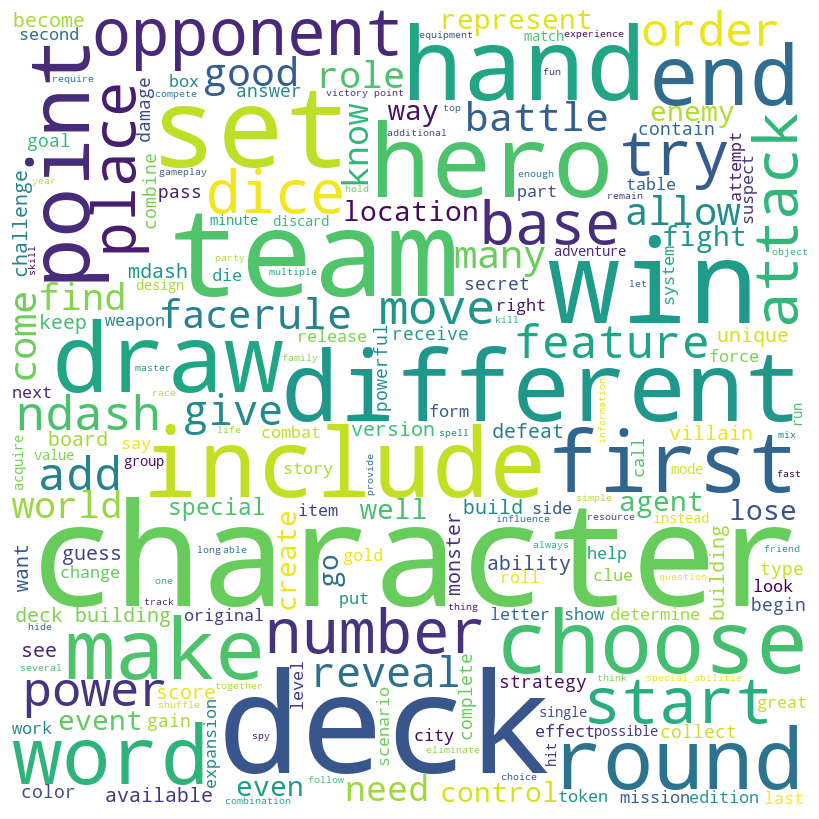

In [9]:
for i in range(6):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [20]:
# plot_model(lda, plot = 'wordcloud', topic_num=f'Topic 0', save=True)

In [11]:
# evaluate_model(lda)